In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")
df1 = pd.read_csv('BCHAIN-MKPRU.csv',header=0,index_col=0,parse_dates = True)
df2 = pd.read_csv('LBMA-GOLD.csv',header=0,index_col=0,parse_dates = True)
df2.fillna(df2.mean(),axis=0,inplace=True)

In [21]:
data = pd.concat([df1,df2],join='inner',axis=1)
data.head()

,Value,USD (PM)
Date,,
2016-09-12,609.67,1324.60
2016-09-13,610.92,1323.65
2016-09-14,608.82,1321.75
2016-09-15,610.38,1310.80
2016-09-16,609.11,1308.35


In [3]:
data.tail()

,Value,USD (PM)
Date,,
2021-09-06,51769.06,1821.60
2021-09-07,52677.40,1802.15
2021-09-08,46809.17,1786.00
2021-09-09,46078.38,1788.25
2021-09-10,46368.69,1794.60


In [85]:
# Calculate Daily Returns
returns = data.pct_change()
returns = returns.dropna()
returns.describe().to_csv("daily ret.csv")

In [86]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

Value       0.004617
USD (PM)    0.000544
dtype: float64


In [87]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

Value       0.048424
USD (PM)    0.025040
dtype: float64


In [88]:
# Define weights for the portfolio权重初始化
weights = np.array([0.33,0.67])

             Value  USD (PM)
Value     0.586226  0.016202
USD (PM)  0.016202  0.156745


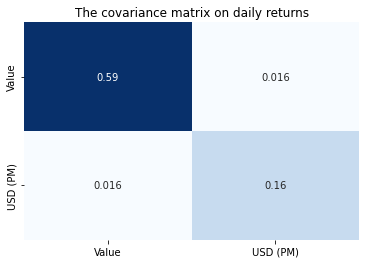

In [89]:
# Calculate the covariance matrix on daily returns
import seaborn as sns
cov_matrix = (returns.cov())*250
print (cov_matrix)
sns.heatmap(cov_matrix, cmap ='Blues', cbar=False,annot=True)
plt.title('The covariance matrix on daily returns')
plt.savefig('the covariance matrix on daily returns.png')

In [90]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)
# Print the portfolio return
print(portReturn)

0.00188778562857391


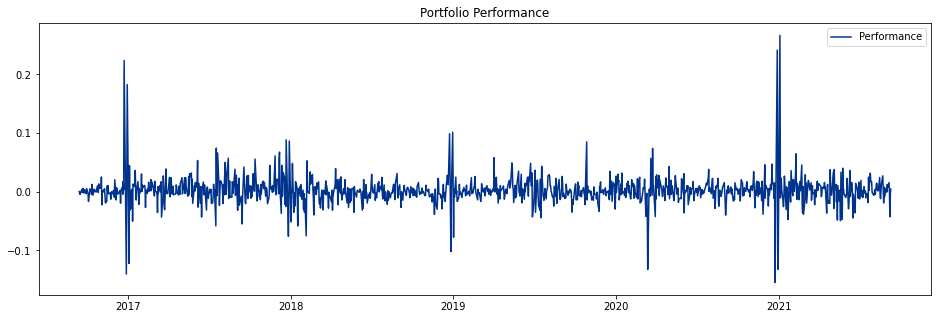

In [91]:
# Create portfolio returns column
returns['Portfolio'] = np.dot(weights,returns.T)
returns.tail()
plt.figure(figsize=(16,5))
plt.plot(returns['Portfolio'],color='#00338D',label = 'Performance')
plt.legend()
plt.title('Portfolio Performance')
plt.savefig('perf.png')
plt.show()

In [92]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                Value  USD (PM)  Portfolio
Date                                      
2021-09-06  84.913248  1.375208   8.023938
2021-09-07  86.403136  1.360524   8.012996
2021-09-08  76.777880  1.348332   7.670312
2021-09-09  75.579215  1.350030   7.637269
2021-09-10  76.055391  1.354824   7.671317


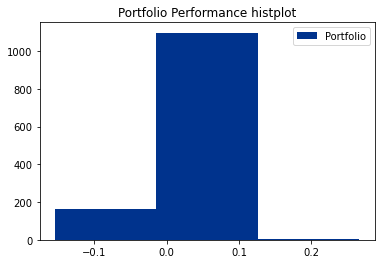

In [93]:
returns['Portfolio'].hist(legend=True,bins=3,color='#00338D',grid=False)
plt.title('Portfolio Performance histplot')
plt.savefig('hist.png')
plt.show()

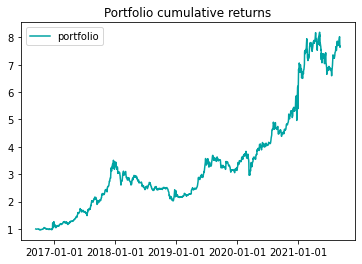

In [94]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='#00A3A3', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.title('Portfolio cumulative returns')
plt.legend()
plt.savefig('portfolio cumulative returns.png')
plt.show()

In [95]:
# Print the mean
print("Mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("Skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("Kurt: ", returns['Portfolio'].kurtosis())
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print('Portfolio Sqrt Std. dev:', str(np.round(port_standard_dev, 4) * 100) + '%')

# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print('Portfolio Var:',str(np.round(port_variance, 4) * 100) + '%')
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 6 year 
annualized_return = ((total_return + 1)**(1/(365)))-1
print('Portfolio Annualized return in 1 year:', str(np.round(port_standard_dev, 4) * 100) + '%')

Mean :  0.18877856285739084
Std. dev:  2.3779626633392357
Skew:  2.2319377295665452
Kurt:  33.30553874211881
Portfolio Sqrt Std. dev: 37.6%
Portfolio Var: 14.14%
Portfolio Annualized return in 1 year: 37.6%


In [96]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

37.6%


In [97]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

14.14%


In [98]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

In [110]:
# Annualize the total return over 6 year 
annualized_return = ((total_return + 1)**(1/(1)))-1
annualized_return

21.737730857964838

In [111]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [112]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print (sharpe_ratio)

In [117]:
for i in range(1,15):
    # Annualize the total return over 6 year 
    annualized_return = ((total_return + 1)**(1/(i)))-1
    sharpe_ratio = ((annualized_return - rf) / vol_port)
    print ('The coming sharpe_ratio in {} day: {:.2f}'.format(i,sharpe_ratio))

The coming sharpe_ratio in 1 day: 57.79
The coming sharpe_ratio in 2 day: 10.00
The coming sharpe_ratio in 3 day: 4.85
The coming sharpe_ratio in 4 day: 3.12
The coming sharpe_ratio in 5 day: 2.28
The coming sharpe_ratio in 6 day: 1.79
The coming sharpe_ratio in 7 day: 1.47
The coming sharpe_ratio in 8 day: 1.24
The coming sharpe_ratio in 9 day: 1.08
The coming sharpe_ratio in 10 day: 0.95
The coming sharpe_ratio in 11 day: 0.85
The coming sharpe_ratio in 12 day: 0.76
The coming sharpe_ratio in 13 day: 0.70
The coming sharpe_ratio in 14 day: 0.64


In [120]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return:{:.2f} ".format(expected_return*100))
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:0.19 
--------------------------------------------------
Downside risk:
Value        3.816442
USD (PM)     2.181406
Portfolio    1.693912
dtype: float64
--------------------------------------------------
Sortino ratio:
Value       -0.212560
USD (PM)    -0.371880
Portfolio   -0.478904
dtype: float64


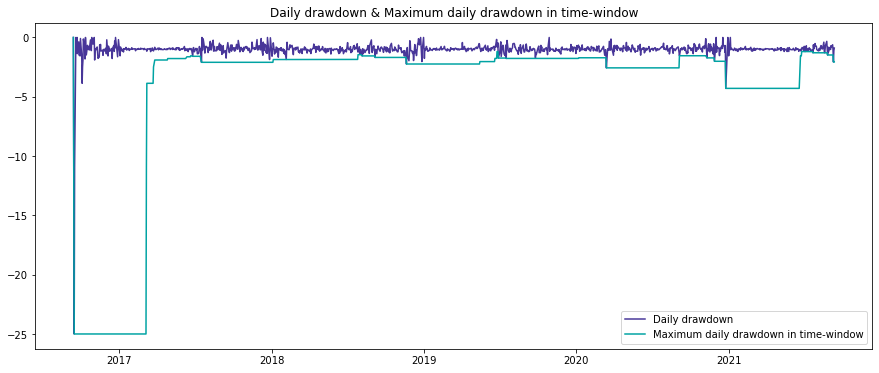

In [124]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=120).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=120).min()

# Plot the results
plt.figure(figsize=(15,6))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown',color='#483699')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window',color ='#00A3A3')
plt.legend()
plt.title('Daily drawdown & Maximum daily drawdown in time-window')
plt.savefig('drawdown.png')
plt.show()